In [1]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 36.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [5]:
#Se formatean los datos de fecha
from datetime import datetime

In [6]:
#Creación de la proyección
import pyproj

P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [7]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


\con los puntos de x, y, logitud y latitud construir la matriz 
sacar: xmin,xmax,ymin,ymax
Restar (xmax-xmin)
se divide la distancia entre 10
x = columna
y= fila

In [8]:
xmin = df['x'].min()
xmax = df['x'].max()
ymin = df['y'].min()
ymax = df['y'].max()
print("xmin:", xmin)
print("xmax:", xmax)
print("ymin:", ymin)
print("ymax:", ymax)

xmin: 707988.5715792507
xmax: 712363.8865034583
ymin: 780501.6340403266
ymax: 785051.1759298786


In [9]:
res = 10
ban = 200

region1 = xmin = df['x'].min() - ban
region2 = xmax = df['x'].max() + ban
region3 = ymin = df['y'].min() - ban
region4 = ymax = df['y'].max() + ban

In [10]:
import math

num_rows = math.ceil((ymax - ymin) / res)
num_cols = math.ceil((xmax - xmin) / res)

num_rows, num_cols

(495, 478)

In [11]:
matrix = np.zeros((num_rows, num_cols))

In [12]:
for index, row in df.iterrows():
    x = row['x']
    y = row['y']
    fila_punto = math.ceil((y - ymin) / res) - 1
    cols_punto = math.ceil((x - xmin) / res) - 1
    matrix[fila_punto, cols_punto] += 1

matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

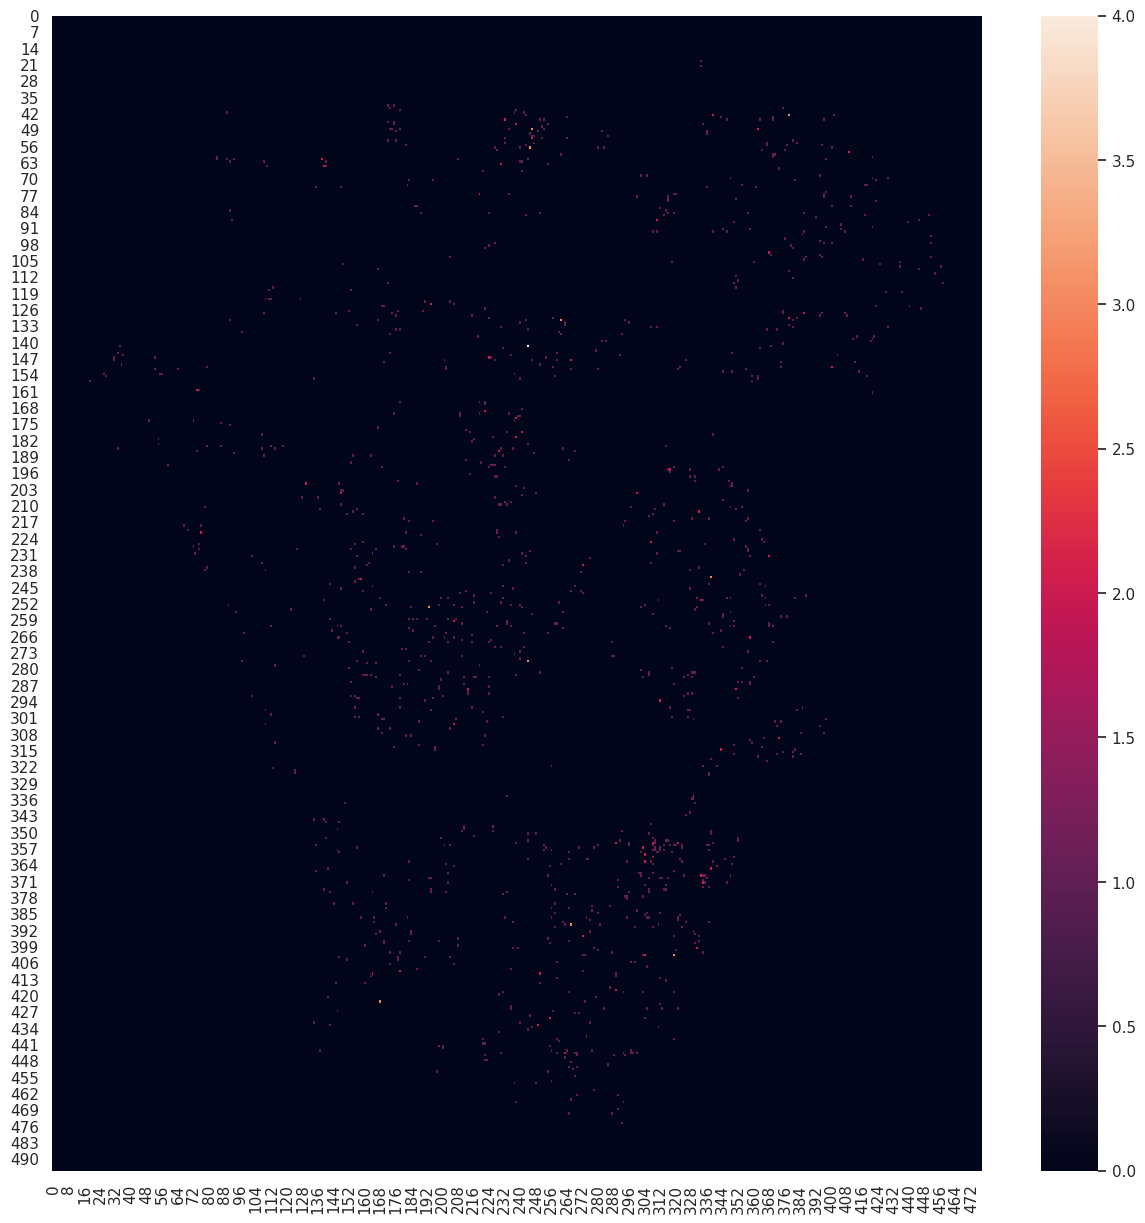

In [13]:
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(matrix)

In [25]:
import math
def calcular_distancia(x1, y1, x2, y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

In [26]:
ban = 200  
res = 10 

# Calcular las dimensiones del grid
num_rows = math.ceil((ymax - ymin) / res)
num_cols = math.ceil((xmax - xmin) / res)


In [29]:

# Crear una matriz para almacenar la densidad
densidad_matrix = np.zeros((num_rows, num_cols))

In [32]:
# Calcular las coordenadas de los puntos en el grid
x_coords = np.arange(xmin, xmax, res)
y_coords = np.arange(ymin, ymax, res)

# Calcular las coordenadas de los puntos en el grid en forma de matriz
x_grid, y_grid = np.meshgrid(x_coords, y_coords)

# Crear una matriz para almacenar las distancias
distances = np.zeros_like(x_grid)

# Iterar sobre los puntos y calcular las distancias
for i, row in df.iterrows():
    x = row['x']
    y = row['y']
    dist = np.sqrt((x_grid - x)**2 + (y_grid - y)**2)
    distances += dist <= ban

# Obtener la matriz de densidad
densidad_matrix = distances


In [33]:
densidad_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

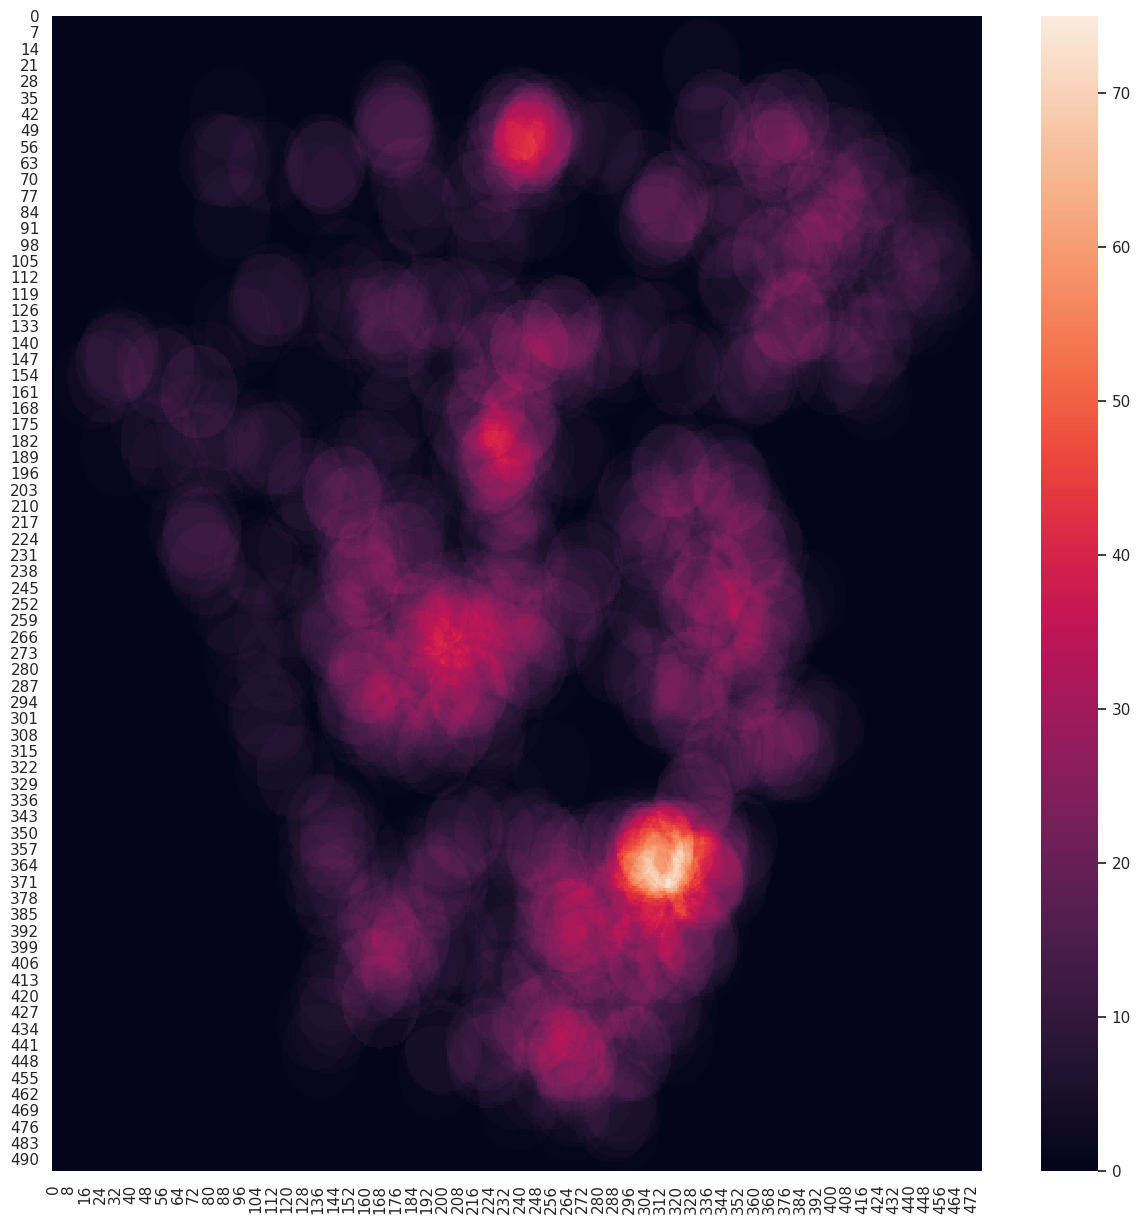

In [34]:
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(densidad_matrix)